In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [11]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()

In [12]:
#  3. Convert the June temperatures to a list.
junetemps = list((June))

In [13]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(junetemps,columns=['date','June Temps'])
june_df.set_index(june_df['date'], inplace=True)

In [14]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [15]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

In [16]:
# 7. Convert the December temperatures to a list.
dectemp = list((december))

In [17]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dectemp,columns=['date','December Temps'])
dec_df.set_index(dec_df['date'], inplace=True)

In [18]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


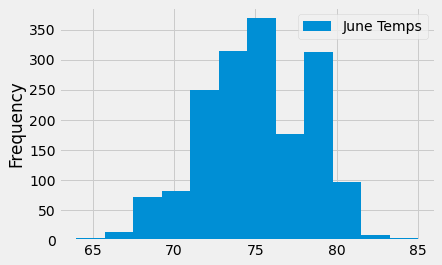

In [21]:
# Additional query #1 (deliverable 3)
june_df.plot.hist(bins=12)
plt.savefig("../Resources/June_Histogram.png")

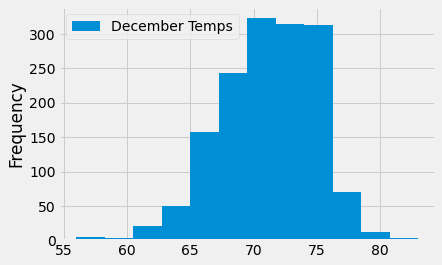

In [23]:
# Additional query #2 (deliverable 3)
dec_df.plot.hist(bins=12)
plt.savefig("../Resources/December_Histogram.png")